## Imports

In [2]:
pip install nnfs

In [3]:
import numpy as np
import pandas as pd
from IPython.display import display, Image
from nnfs.datasets import spiral_data

## Forward Pass


### Coding one layer

In Numpy np.dot can be used for multiplication of:
* Two vectors
* one vector and one matrix
* Two matrices




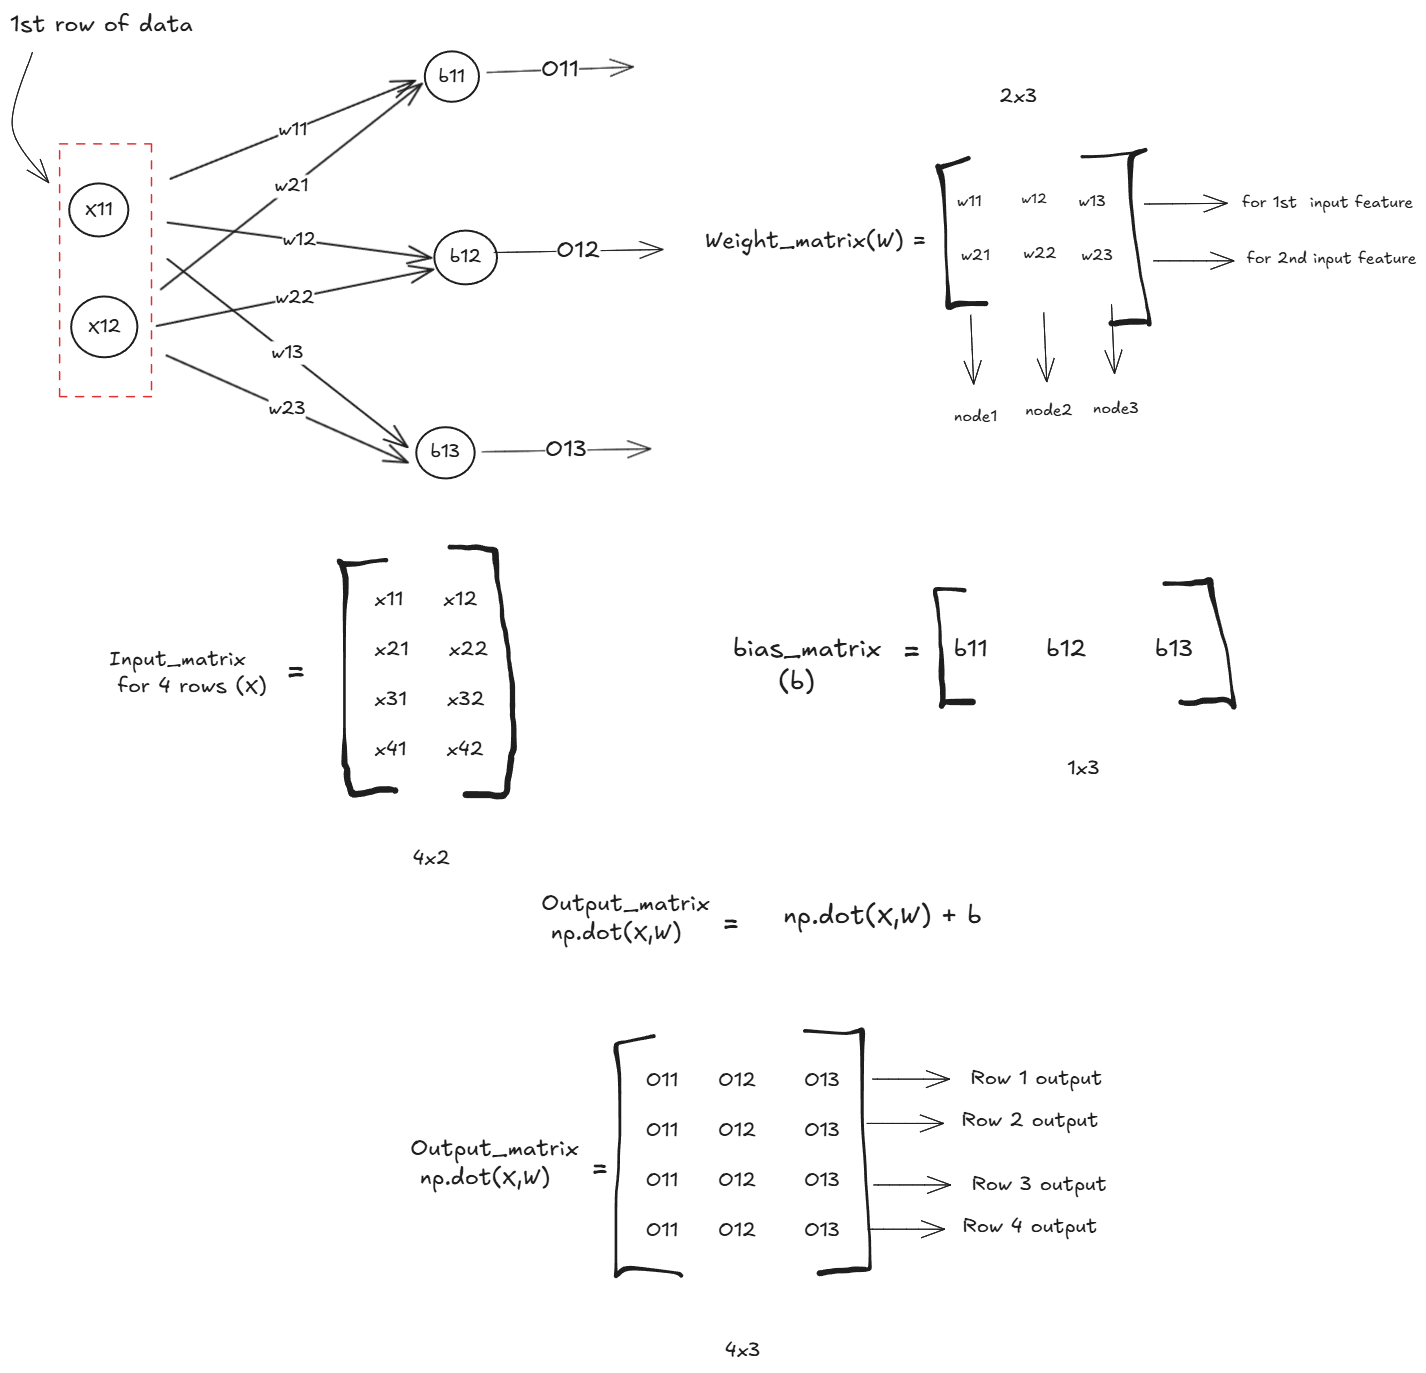

In [ ]:
from IPython.display import display, Image

display(Image("/content/NN1.png", width=800, height=800))  # Adjust width & height as needed


In [ ]:
X = np.random.randn(4, 2)
W = np.random.randn(2, 3)
b = np.random.randn(1, 3)

output_matrix = np.dot(X, W) + b

print(f'X: \n{X}\n')
print(f'W: \n{W}\n')
print(f'b: \n{b}\n')
print(f'output_matrix:\n {output_matrix}\n')
print(f'output_matrix shape : {output_matrix.shape}')


X: 
[[ 1.27518018  0.98396677]
 [-1.29747685 -2.31581687]
 [ 0.18950872  0.93425002]
 [-1.46515925  0.75016817]]

W: 
[[-1.85781523  0.15842799  0.03953601]
 [ 1.45502775 -1.85531749 -0.30230419]]

b: 
[[-0.37427419  0.70708768 -0.86286052]]

output_matrix:
 [[-1.3116244  -0.91645884 -1.10990227]
 [-1.33337976  4.79810657 -0.21407643]
 [ 0.63301332 -0.99621924 -1.1377958 ]
 [ 3.43923647 -0.91683468 -1.14756606]]

output_matrix shape : (4, 3)


### Coding two layers

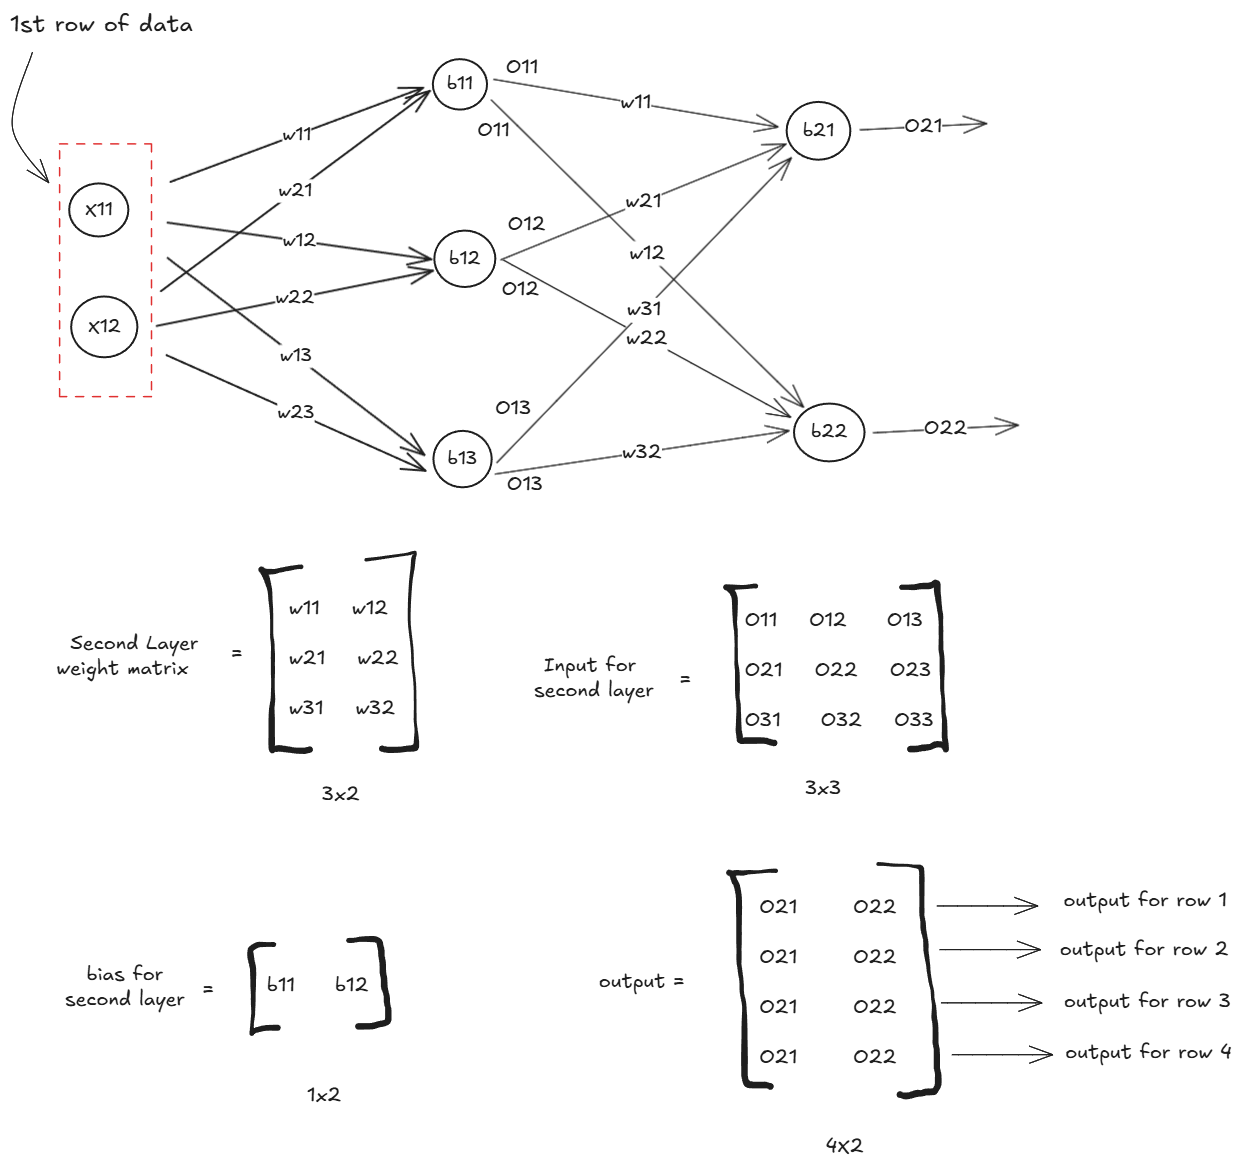

In [ ]:
from IPython.display import display, Image

display(Image("/content/NN2.png", width=800, height=800))  # Adjust width & height as needed


In [ ]:
# Adding one more layer
X = np.random.randn(4, 2)
W1 = np.random.randn(2, 3)
b1 = np.random.randn(1, 3)
W2 = np.random.randn(3, 2)
b2 = np.random.randn(1, 2)

layer_1_output = np.dot(X, W1) + b1
layer_2_output = np.dot(layer_1_output, W2) + b2


print(f'X: \n{X}\n')
print(f'W1: \n{W1}\n')
print(f'b1: \n{b1}\n')
print(f'W2: \n{W2}\n')
print(f'b2: \n{b2}\n')
print(f'layer_1_output:\n {layer_1_output}\n')
print(f'layer_1_output shape : {layer_1_output.shape}\n')
print(f'layer_2_output:\n {layer_2_output}\n')
print(f'layer_2_output shape : {layer_2_output.shape}')

X: 
[[-0.88122324  0.29307702]
 [-0.6686573   1.48206159]
 [-1.8407444  -0.05620894]
 [ 0.06962093  0.34495357]]

W1: 
[[ 0.07443723 -1.06790408  1.0810296 ]
 [-0.26265953  0.73901869 -1.47762224]]

b1: 
[[ 0.51668778 -1.04587348  1.76312799]]

W2: 
[[-0.21374146  0.44932938]
 [ 1.14245095 -0.90458477]
 [-0.02233756 -0.61392719]]

b2: 
[[-1.3476061   0.16470189]]

layer_1_output:
 [[ 0.37411249  0.11177781  0.37744245]
 [ 0.07763718  0.76345959 -1.14963752]
 [ 0.39443168  0.87832552 -0.14371562]
 [ 0.43126482 -0.86529482  1.32867921]]

layer_1_output shape : (4, 3)

layer_2_output:
 [[-1.30829992e+00 -3.30692704e-05]
 [-4.66305149e-01  2.14766360e-01]
 [-4.25258424e-01 -3.64357328e-01]
 [-2.45802161e+00  3.25502069e-01]]

layer_2_output shape : (4, 2)


### Building a dense layer class

In [ ]:
# Dense layer
class Layer_Dense:
 # Layer initialization
 def __init__(self, n_inputs, n_neurons):
 # Initialize weights and biases
   np.random.seed(2)
   self.weights = np.round(0.1 * np.random.randn(n_inputs, n_neurons), decimals=2)
   self.biases = np.zeros((1, n_neurons))

 # Forward pass
 def forward(self, inputs):
 # Calculate output values from inputs, weights and biases
   self.output =  np.round(np.dot(inputs, self.weights) + self.biases, decimals=2)


### Building Relu activation class


* To capture the non linear relationship: f(x) = max(0,x)

In [ ]:
# ReLU activation
class Activation_ReLU:
 # Forward pass
 def forward(self, inputs):
 # Calculate output values from input
  self.output = np.maximum(0, inputs)

### Building Softmax activation class

* Logits Relu(Z) are raw scores that result from a linear transformation Relu(XW+b). However, these values do not represent probabilities (i.e., they don’t sum to 1).

* Softmax gives normalized probabilities.

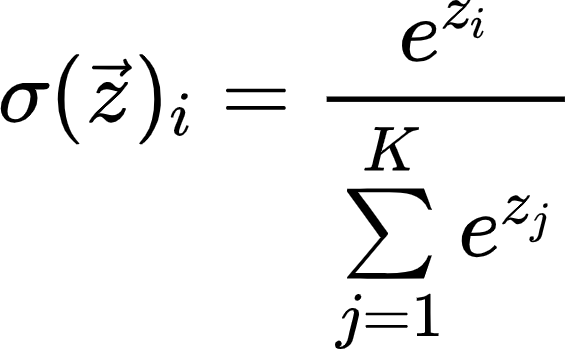

In [ ]:
file = '/content/1_bol3L-WNVacCscvG-rlypQ.png'
display(Image(filename=file, embed=True, width=250, height=150))

In [ ]:
# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

### Entire Forward Pass for 3 classes

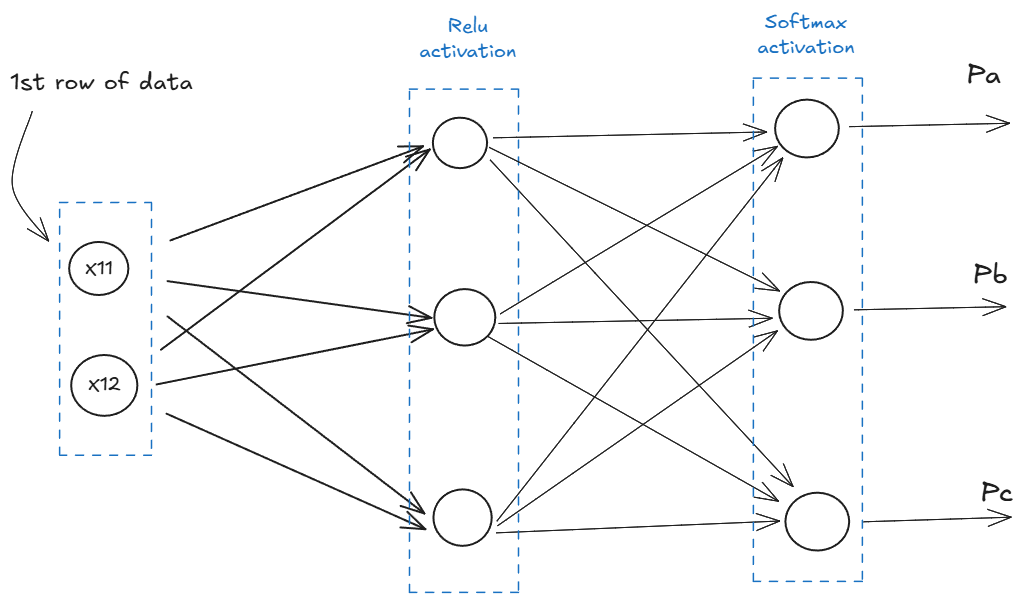

In [ ]:
display(Image("/content/NN3.png", width=800, height=450))  # Adjust width & height as needed


In [ ]:
# Sample data with two feature
X

array([[-0.88122324,  0.29307702],
       [-0.6686573 ,  1.48206159],
       [-1.8407444 , -0.05620894],
       [ 0.06962093,  0.34495357]])

In [ ]:
# Forward pass
l1 = Layer_Dense(2,3)
l2 = Layer_Dense(3,3)
l1.forward(X)
l2.forward(l1.output)
l2.output
relu = Activation_ReLU()
relu.forward(l1.output)
softmax = Activation_Softmax()
softmax.forward(relu.output)
print(f'softmax output : \n{softmax.output}\n')
print(f'softmax output sum : \n{np.sum(softmax.output,axis=1,keepdims=True)}')

softmax output : 
[[0.33262336 0.30705006 0.36032658]
 [0.39097941 0.30146529 0.3075553 ]
 [0.29749388 0.28870161 0.41380451]
 [0.34453546 0.32773227 0.32773227]]

softmax output sum : 
[[1.]
 [1.]
 [1.]
 [1.]]


### Build Loss function class

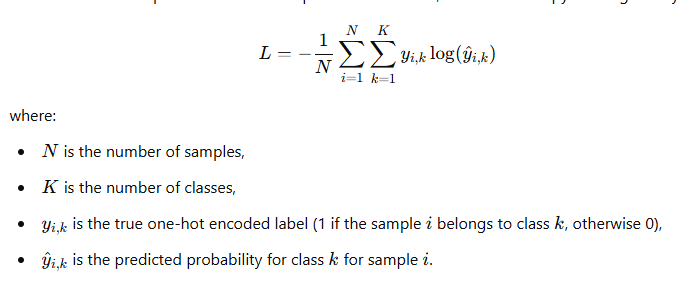

In [ ]:
display(Image("/content/Screenshot (11).png", width=550, height=250))  # Adjust width & height as needed


In [ ]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [ ]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
 # Forward pass
 def forward(self, y_pred, y_true):
  # Number of samples in a batch
  samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values -
  # only if categorical labels
  if len(y_true.shape) == 1:
   correct_confidences = y_pred_clipped[
   range(samples),
   y_true
   ]
  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2:
   correct_confidences = np.sum(
   y_pred_clipped*y_true,
   axis=1
   )
 # Losses
  negative_log_likelihoods = -np.log(correct_confidences)
  return negative_log_likelihoods

**Calculating loss in forward pass**

* Importing a classification dataset of 3 classes

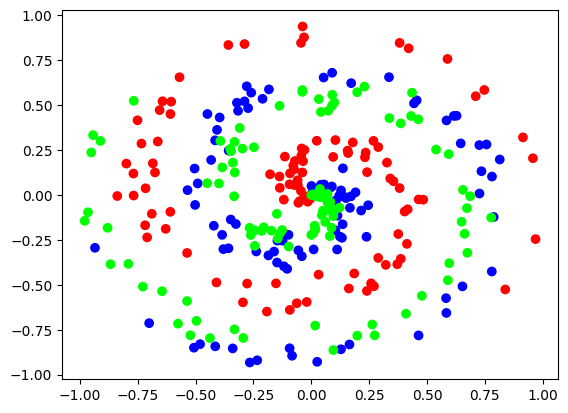

In [ ]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [ ]:
X.shape

(300, 2)

In [ ]:
y.shape

(300,)

In [ ]:
np.unique(y)

array([0, 1, 2], dtype=uint8)

In [ ]:
# Forward pass
layer1 = Layer_Dense(2,3)
layer1.forward(X)

relu_layer = Activation_ReLU()
relu_layer.forward(l1.output)

layer2 = Layer_Dense(3,3)
layer2.forward(relu_layer.output)

softmax_layer = Activation_Softmax()
softmax_layer.forward(layer2.output)

loss = Loss_CategoricalCrossentropy()

print(f'softmax output shape : \n{softmax.output.shape}\n')


softmax output shape : 
(300, 3)



In [ ]:
softmax_layer.output.shape

(300, 3)

* Below we can see that all 3 class probabilities are near equal, which is the worst case.

In [ ]:
softmax_layer.output[0:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334]], dtype=float32)

In [ ]:
loss.calculate(softmax_layer.output, y)

np.float32(1.0978959)

* Coding Accuracy function

In [ ]:
# Calculate accuracy from output of activation and targets
# calculate values along first axis
predictions = np.argmax(softmax_layer.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

* Our model is 35% accurate now, which is fine as we are not applying any optimization.

In [ ]:
float(accuracy)

0.35

## Backward Pass

### Adding Backpropogation function in Dense layer class

Output of one layer can be input of another. So loss depends on it too. Therefore we need to calculate gradients wrt input also.

In [ ]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)             # gradient wrt weights
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)      # gradients wrt bias
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


### Adding Backpropogation in Relu class

In [ ]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


### Combined backpropogation on (softmax + Categorical cross entropy loss)

In [ ]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [ ]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


In [ ]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

## One full forward and backward pass

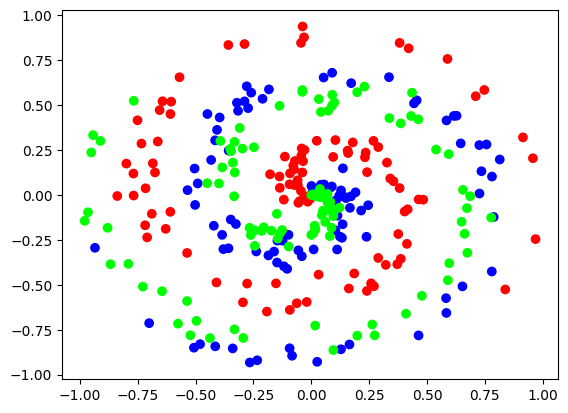

In [ ]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [ ]:
print(X.shape,'\n',np.unique(y))

(300, 2) 
 [0 1 2]


In [ ]:
dense1 = Layer_Dense(2,3)
dense1.forward(X)
dense1.output[0:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0475188e-04,  1.1395361e-04, -4.7983500e-05],
       [-2.7414842e-04,  3.1729150e-04, -8.6921798e-05],
       [-4.2188365e-04,  5.2666257e-04, -5.5912682e-05],
       [-5.7707680e-04,  7.1401405e-04, -8.9430439e-05]], dtype=float32)

In [ ]:
activation1 = Activation_ReLU()
activation1.forward(dense1.output)
activation1.output[0:5]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.00011395, 0.        ],
       [0.        , 0.00031729, 0.        ],
       [0.        , 0.00052666, 0.        ],
       [0.        , 0.00071401, 0.        ]], dtype=float32)

In [ ]:
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax_Loss_CategoricalCrossentropy()
dense2.forward(activation1.output)
loss = activation2.forward(dense2.output,y)
print(activation2.output[0:5],'\n')
print(f'loss: {loss}')
print(f'shape of output : {activation2.output.shape}')


# Calculate accuracy from output of activation and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)


print(f'\naccuracy: {accuracy}')

[[0.33333334 0.33333334 0.33333334]
 [0.33333355 0.33333325 0.3333332 ]
 [0.33333397 0.3333331  0.333333  ]
 [0.33333433 0.33333293 0.33333272]
 [0.3333347  0.33333284 0.33333254]] 

loss: 1.0986133813858032
shape of output : (300, 3)

accuracy: 0.34


In [ ]:
activation2.backward(activation2.output,y)
print(activation2.dinputs[0:5],'\n')
print(f'shape of dinputs: {activation2.dinputs.shape}')

[[-0.00222222  0.00111111  0.00111111]
 [-0.00222222  0.00111111  0.00111111]
 [-0.00222222  0.00111111  0.00111111]
 [-0.00222222  0.00111111  0.00111111]
 [-0.00222222  0.00111111  0.00111111]] 

shape of dinputs: (300, 3)


In [ ]:
dense2.backward(activation2.dinputs)
print(dense2.dinputs[0:5],'\n')
print(f'shape of dinputs: {dense2.dinputs.shape}')

[[ 1.7148228e-05 -2.0924734e-05 -2.1277581e-05]
 [ 1.7148221e-05 -2.0924726e-05 -2.1277579e-05]
 [ 1.7148210e-05 -2.0924714e-05 -2.1277572e-05]
 [ 1.7148190e-05 -2.0924697e-05 -2.1277567e-05]
 [ 1.7148177e-05 -2.0924686e-05 -2.1277563e-05]] 

shape of dinputs: (300, 3)


In [ ]:
activation1.backward(dense2.dinputs)
print(activation1.dinputs[0:5],'\n')
print(f'shape of dinputs: {activation1.dinputs.shape}')

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -2.0924726e-05  0.0000000e+00]
 [ 0.0000000e+00 -2.0924714e-05  0.0000000e+00]
 [ 0.0000000e+00 -2.0924697e-05  0.0000000e+00]
 [ 0.0000000e+00 -2.0924686e-05  0.0000000e+00]] 

shape of dinputs: (300, 3)


In [ ]:
dense1.backward(activation1.dinputs)
print(dense1.dinputs[0:5],'\n')
print(f'shape of dinputs: {dense1.dinputs.shape}')

[[ 0.0000000e+00  0.0000000e+00]
 [-3.4695930e-07 -1.3943884e-07]
 [-3.4695910e-07 -1.3943875e-07]
 [-3.4695881e-07 -1.3943864e-07]
 [-3.4695864e-07 -1.3943857e-07]] 

shape of dinputs: (300, 2)


In [ ]:
dense1.dweights.shape

(2, 3)

In [ ]:
dense1.dbiases.shape

(1, 3)

## Full ANN code

In [37]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)             # gradient wrt weights
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)      # gradients wrt bias
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities


  # Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss



class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
      # Number of samples in a batch
      samples = len(y_pred)

      # Clip data to prevent division by 0
      # Clip both sides to not drag mean towards any value
      y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

      # Probabilities for target values -
      # only if categorical labels
      if len(y_true.shape) == 1:
          correct_confidences = y_pred_clipped[
              range(samples),
              y_true
          ]
      # Mask values - only for one-hot encoded labels
      elif len(y_true.shape) == 2:
          correct_confidences = np.sum(
              y_pred_clipped * y_true,
              axis=1
          )

      # Losses
      negative_log_likelihoods = -np.log(correct_confidences)
      return negative_log_likelihoods

  # Backward pass (we will not use this backpropogation)
  def backward(self, dvalues, y_true):
      # Number of samples
      samples = len(dvalues)
      # Number of labels in every sample
      # We'll use the first sample to count them
      labels = len(dvalues[0])

      # If labels are sparse, turn them into one-hot vector
      if len(y_true.shape) == 1:
          y_true = np.eye(labels)[y_true]

      # Calculate gradient
      self.dinputs = -y_true / dvalues
      # Normalize gradient
      self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

## Optimizers

### Coding Gradient Descent optimizer class

In [ ]:
class Optimizer_SGD:

  def __init__(self,learning_rate=1):
    self.learning_rate = learning_rate

#update parameters
  def update_params(self,layer):
    layer.weights += -self.learning_rate * layer.dweights
    layer.biases += -self.learning_rate * layer.dbiases


* Optimizing our algorithm

In [ ]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(learning_rate=0.8)

# Train in loop
for epoch in range(1000):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.310, loss: 1.099
epoch: 100, acc: 0.429, loss: 1.069
epoch: 200, acc: 0.450, loss: 1.067
epoch: 300, acc: 0.448, loss: 1.064
epoch: 400, acc: 0.410, loss: 1.063
epoch: 500, acc: 0.407, loss: 1.049
epoch: 600, acc: 0.405, loss: 1.028
epoch: 700, acc: 0.409, loss: 1.004
epoch: 800, acc: 0.443, loss: 0.991
epoch: 900, acc: 0.453, loss: 0.979


* We stuck in local minima probabily.

### Adding decaying learning rate in Gradient descent

In [ ]:
class Optimizer_SGD:

  def __init__(self,learning_rate=1,decay=0):
    self.learning_rate = learning_rate
    self.current_learning_rate = learning_rate
    self.decay = decay
    self.iterations = 0

  def pre_update_params(self):
    if self.decay:
      self.current_learning_rate = self.learning_rate * (1 / (1 + self.decay * self.iterations))

  #update parameters
  def update_params(self,layer):
    layer.weights += -self.current_learning_rate * layer.dweights
    layer.biases += -self.current_learning_rate * layer.dbiases

  def post_update_params(self):
    self.iterations += 1

In [ ]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay = 1e-3)

# Train in loop
for epoch in range(10000):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.310, loss: 1.099, lr: 1
epoch: 100, acc: 0.422, loss: 1.080, lr: 0.9099181073703367
epoch: 200, acc: 0.417, loss: 1.070, lr: 0.8340283569641367
epoch: 300, acc: 0.444, loss: 1.068, lr: 0.7698229407236336
epoch: 400, acc: 0.451, loss: 1.067, lr: 0.7147962830593281
epoch: 500, acc: 0.449, loss: 1.066, lr: 0.66711140760507
epoch: 600, acc: 0.448, loss: 1.066, lr: 0.6253908692933083
epoch: 700, acc: 0.447, loss: 1.065, lr: 0.5885815185403178
epoch: 800, acc: 0.449, loss: 1.064, lr: 0.5558643690939411
epoch: 900, acc: 0.452, loss: 1.063, lr: 0.526592943654555
epoch: 1000, acc: 0.454, loss: 1.060, lr: 0.5002501250625312
epoch: 1100, acc: 0.455, loss: 1.058, lr: 0.4764173415912339
epoch: 1200, acc: 0.455, loss: 1.054, lr: 0.45475216007276037
epoch: 1300, acc: 0.453, loss: 1.049, lr: 0.43497172683775553
epoch: 1400, acc: 0.452, loss: 1.043, lr: 0.4168403501458941
epoch: 1500, acc: 0.450, loss: 1.037, lr: 0.4001600640256102
epoch: 1600, acc: 0.456, loss: 1.030, lr: 0.3847633705

### Adding momentum to Gradient descent

In [ ]:
import numpy as np

class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)



            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with current gradients
            layer.weight_momentums = self.momentum * layer.weight_momentums + (1 - self.momentum) * layer.dweights
            weight_updates = -self.current_learning_rate * layer.weight_momentums

            # Build bias updates
            layer.bias_momentums = self.momentum * layer.bias_momentums + (1 - self.momentum) * layer.dbiases
            bias_updates = -self.current_learning_rate * layer.bias_momentums

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [ ]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay = 1e-3, momentum=0.8)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.310, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.422, loss: 1.085, lr: 0.9099181073703367
epoch: 200, acc: 0.420, loss: 1.071, lr: 0.8340283569641367
epoch: 300, acc: 0.442, loss: 1.068, lr: 0.7698229407236336
epoch: 400, acc: 0.451, loss: 1.067, lr: 0.7147962830593281
epoch: 500, acc: 0.448, loss: 1.067, lr: 0.66711140760507
epoch: 600, acc: 0.447, loss: 1.066, lr: 0.6253908692933083
epoch: 700, acc: 0.448, loss: 1.066, lr: 0.5885815185403178
epoch: 800, acc: 0.450, loss: 1.064, lr: 0.5558643690939411
epoch: 900, acc: 0.452, loss: 1.063, lr: 0.526592943654555
epoch: 1000, acc: 0.454, loss: 1.061, lr: 0.5002501250625312
epoch: 1100, acc: 0.452, loss: 1.058, lr: 0.4764173415912339
epoch: 1200, acc: 0.451, loss: 1.054, lr: 0.45475216007276037
epoch: 1300, acc: 0.453, loss: 1.050, lr: 0.43497172683775553
epoch: 1400, acc: 0.453, loss: 1.044, lr: 0.4168403501458941
epoch: 1500, acc: 0.444, loss: 1.038, lr: 0.4001600640256102
epoch: 1600, acc: 0.450, loss: 1.031, lr: 0.38476337

### Coding ADAGRAD optimizer

In [ ]:
import numpy as np

# Adagrad optimizer
class Optimizer_Adagrad:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
            layer.dbiases / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [ ]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adagrad(decay = 1e-4)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.310, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.411, loss: 0.981, lr: 0.9901970492127933
epoch: 200, acc: 0.449, loss: 0.940, lr: 0.9804882831650161
epoch: 300, acc: 0.500, loss: 0.905, lr: 0.9709680551509855
epoch: 400, acc: 0.551, loss: 0.877, lr: 0.9616309260505818
epoch: 500, acc: 0.532, loss: 0.878, lr: 0.9524716639679969
epoch: 600, acc: 0.580, loss: 0.827, lr: 0.9434852344560807
epoch: 700, acc: 0.590, loss: 0.816, lr: 0.9346667912889054
epoch: 800, acc: 0.586, loss: 0.797, lr: 0.9260116677470135
epoch: 900, acc: 0.573, loss: 0.780, lr: 0.9175153683824203
epoch: 1000, acc: 0.602, loss: 0.771, lr: 0.9091735612328392
epoch: 1100, acc: 0.610, loss: 0.760, lr: 0.9009820704567978
epoch: 1200, acc: 0.639, loss: 0.752, lr: 0.892936869363336
epoch: 1300, acc: 0.606, loss: 0.746, lr: 0.8850340738118416
epoch: 1400, acc: 0.611, loss: 0.730, lr: 0.8772699359592947
epoch: 1500, acc: 0.636, loss: 0.728, lr: 0.8696408383337683
epoch: 1600, acc: 0.643, loss: 0.727, lr: 0.86214328

* Adagrad performed better than Gradient descent with momentum

### Coding RMSProp optimizer

In [ ]:
import numpy as np

class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
                             (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
                           (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [ ]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(decay = 1e-4)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.310, loss: 1.099, lr: 0.001
epoch: 100, acc: 0.418, loss: 1.071, lr: 0.0009901970492127933
epoch: 200, acc: 0.435, loss: 1.068, lr: 0.0009804882831650162
epoch: 300, acc: 0.446, loss: 1.064, lr: 0.0009709680551509856
epoch: 400, acc: 0.437, loss: 1.060, lr: 0.0009616309260505818
epoch: 500, acc: 0.430, loss: 1.055, lr: 0.0009524716639679969
epoch: 600, acc: 0.419, loss: 1.049, lr: 0.0009434852344560807
epoch: 700, acc: 0.414, loss: 1.041, lr: 0.0009346667912889054
epoch: 800, acc: 0.421, loss: 1.032, lr: 0.0009260116677470135
epoch: 900, acc: 0.426, loss: 1.022, lr: 0.0009175153683824203
epoch: 1000, acc: 0.451, loss: 1.011, lr: 0.0009091735612328393
epoch: 1100, acc: 0.476, loss: 1.000, lr: 0.0009009820704567978
epoch: 1200, acc: 0.485, loss: 0.990, lr: 0.0008929368693633361
epoch: 1300, acc: 0.484, loss: 0.979, lr: 0.0008850340738118417
epoch: 1400, acc: 0.506, loss: 0.969, lr: 0.0008772699359592947
epoch: 1500, acc: 0.509, loss: 0.959, lr: 0.0008696408383337683
epoc

* Adagrad gave better results. So only for huge iteration Adagrad lerning rate become stagnant.

### Coding ADAM optimizer

In [38]:
import numpy as np

# Adam optimizer
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.02, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [8]:
# Create dataset
np.random.seed(1)
X, y = spiral_data(samples=300, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(decay = 1e-5)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.363, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.588, loss: 0.869, lr: 0.01998021958261321
epoch: 200, acc: 0.751, loss: 0.616, lr: 0.019960279044701046
epoch: 300, acc: 0.790, loss: 0.492, lr: 0.019940378268975763
epoch: 400, acc: 0.809, loss: 0.433, lr: 0.01992051713662487
epoch: 500, acc: 0.827, loss: 0.399, lr: 0.01990069552930875
epoch: 600, acc: 0.837, loss: 0.376, lr: 0.019880913329158343
epoch: 700, acc: 0.847, loss: 0.355, lr: 0.019861170418772778
epoch: 800, acc: 0.850, loss: 0.342, lr: 0.019841466681217078
epoch: 900, acc: 0.849, loss: 0.334, lr: 0.01982180200001982
epoch: 1000, acc: 0.858, loss: 0.325, lr: 0.019802176259170884
epoch: 1100, acc: 0.854, loss: 0.320, lr: 0.01978258934311912
epoch: 1200, acc: 0.861, loss: 0.315, lr: 0.01976304113677013
epoch: 1300, acc: 0.861, loss: 0.311, lr: 0.019743531525483964
epoch: 1400, acc: 0.848, loss: 0.314, lr: 0.01972406039507293
epoch: 1500, acc: 0.868, loss: 0.302, lr: 0.019704627631799327
epoch: 1600, acc: 0.864, lo

* Got the best results from ADAM

## Validation

In [6]:
np.random.seed(1)
X, Y = spiral_data(samples=500, classes=3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(decay = 1e-5)

train_loss = []
train_acc = []
val_loss = []
val_acc = []

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Train in loop
for epoch in range(1000):

    # train pass

    # Perform a forward pass of our training data through this layer
    dense1.forward(x_train)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y_train)
    train_loss.append(loss)

    # train

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_train.shape) == 2:
        y = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == y_train)
    train_acc.append(accuracy)





    # Backward pass
    loss_activation.backward(loss_activation.output, y_train)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)



    # val pass

    # Perform a forward pass of our val data through this layer
    dense1.forward(x_val)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y_val)
    val_loss.append(loss)



    # val accuracy

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_val.shape) == 2:
        y = np.argmax(y_val, axis=1)
    accuracy = np.mean(predictions == y_val)
    val_acc.append(accuracy)


    if not epoch % 100:
          print(f'epoch: {epoch}, ' +
          f'acc: {train_acc[-1]:.3f}, ' +
          f'loss: {train_loss[-1]:.3f}, ' +
          f'lr: {optimizer.current_learning_rate}, '+
          f'val_acc: {val_acc[-1]:.3f}, ' +
          f'val_loss: {val_loss[-1]:.3f}')



    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.371, loss: 1.099, lr: 0.02, val_acc: 0.354, val_loss: 1.099
epoch: 100, acc: 0.517, loss: 0.944, lr: 0.01998021958261321, val_acc: 0.496, val_loss: 0.966
epoch: 200, acc: 0.614, loss: 0.809, lr: 0.019960279044701046, val_acc: 0.596, val_loss: 0.826
epoch: 300, acc: 0.666, loss: 0.725, lr: 0.019940378268975763, val_acc: 0.637, val_loss: 0.764
epoch: 400, acc: 0.708, loss: 0.669, lr: 0.01992051713662487, val_acc: 0.637, val_loss: 0.747
epoch: 500, acc: 0.708, loss: 0.644, lr: 0.01990069552930875, val_acc: 0.658, val_loss: 0.731
epoch: 600, acc: 0.715, loss: 0.623, lr: 0.019880913329158343, val_acc: 0.662, val_loss: 0.737
epoch: 700, acc: 0.720, loss: 0.609, lr: 0.019861170418772778, val_acc: 0.667, val_loss: 0.727
epoch: 800, acc: 0.718, loss: 0.595, lr: 0.019841466681217078, val_acc: 0.667, val_loss: 0.719
epoch: 900, acc: 0.704, loss: 0.588, lr: 0.01982180200001982, val_acc: 0.671, val_loss: 0.722


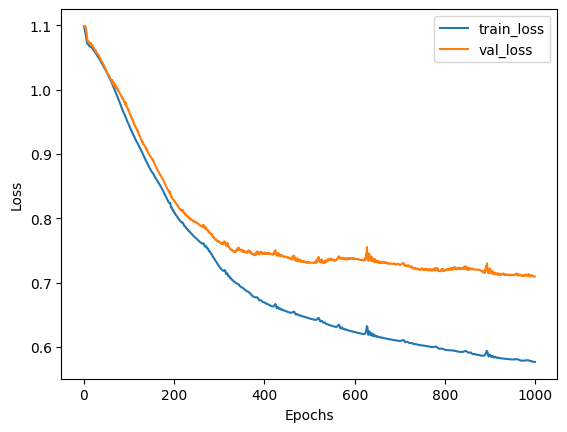

In [9]:
# plot
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

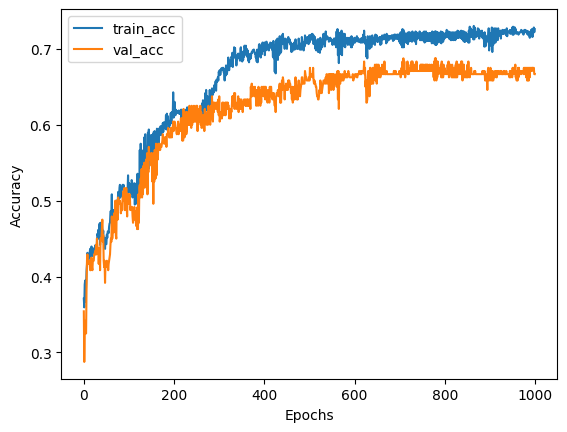

In [10]:
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* Our model is overfitting

In [11]:
# Validate the model

# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, Y_test)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(Y_test.shape) == 2:
 y_test = np.argmax(Y_test, axis=1)
accuracy = np.mean(predictions == Y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.697, loss: 0.627


## Regularization

### Dropout

In [39]:
class Layer_dropout:

  def __init__(self, rate):
    self.rate = 1 - rate

  def forward(self, inputs):
    self.inputs = inputs
    self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
    self.output = inputs * self.binary_mask

  def backward(self, dvalues):
    self.dinputs = dvalues * self.binary_mask

## Validation with dropouts

In [40]:
np.random.seed(1)
X, Y = spiral_data(samples=500, classes=3)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

* Adding dropout and one more dense layer

In [43]:
# Create first Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

drop1 = Layer_dropout(0.2)  # Dropout after activation


# Create second Dense layer with 64 input features and 64 output values
dense2 = Layer_Dense(64, 64)
activation2 = Activation_ReLU()
drop2 = Layer_dropout(0.2)  # Dropout after activation

# Create third Dense layer with 64 input features and 3 output values
dense3 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Adam Optimizer
optimizer = Optimizer_Adam(decay=1e-5)

# To store loss and accuracy history
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Split dataset
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

x_train_trans = scaler.fit_transform(x_train)
x_val_trans = scaler.transform(x_val)
# Training loop
for epoch in range(1000):

    # --- Forward pass (Training) ---
    dense1.forward(x_train_trans)
    activation1.forward(dense1.output)
    drop1.forward(activation1.output)

    dense2.forward(drop1.output)
    activation2.forward(dense2.output)
    drop2.forward(activation2.output)

    dense3.forward(drop2.output)

    # Compute training loss
    loss = loss_activation.forward(dense3.output, y_train)
    train_loss.append(loss)

    # Compute training accuracy
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_train.shape) == 2:
        y_train_labels = np.argmax(y_train, axis=1)
    else:
        y_train_labels = y_train
    accuracy = np.mean(predictions == y_train_labels)
    train_acc.append(accuracy)

    # --- Backward pass (Training) ---
    loss_activation.backward(loss_activation.output, y_train)
    dense3.backward(loss_activation.dinputs)
    drop2.backward(dense3.dinputs)
    activation2.backward(drop2.dinputs)
    dense2.backward(activation2.dinputs)
    drop1.backward(dense2.dinputs)
    activation1.backward(drop1.dinputs)
    dense1.backward(activation1.dinputs)

    # --- Forward pass (Validation) ---
    dense1.forward(x_val_trans)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    dense3.forward(activation2.output)

    # Compute validation loss
    val_loss.append(loss_activation.forward(dense3.output, y_val))

    # Compute validation accuracy
    val_predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_val.shape) == 2:
        y_val_labels = np.argmax(y_val, axis=1)
    else:
        y_val_labels = y_val
    val_accuracy = np.mean(val_predictions == y_val_labels)
    val_acc.append(val_accuracy)

    # Print metrics every 100 epochs
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'train acc: {train_acc[-1]:.3f}, ' +
              f'train loss: {train_loss[-1]:.3f}, ' +
              f'val acc: {val_acc[-1]:.3f}, ' +
              f'val loss: {val_loss[-1]:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # --- Update Weights ---
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()


epoch: 0, train acc: 0.306, train loss: 1.099, val acc: 0.329, val loss: 1.099, lr: 0.02
epoch: 100, train acc: 0.803, train loss: 0.496, val acc: 0.858, val loss: 0.437, lr: 0.01998021958261321
epoch: 200, train acc: 0.843, train loss: 0.393, val acc: 0.875, val loss: 0.374, lr: 0.019960279044701046
epoch: 300, train acc: 0.849, train loss: 0.366, val acc: 0.854, val loss: 0.398, lr: 0.019940378268975763
epoch: 400, train acc: 0.878, train loss: 0.335, val acc: 0.887, val loss: 0.356, lr: 0.01992051713662487
epoch: 500, train acc: 0.861, train loss: 0.351, val acc: 0.875, val loss: 0.363, lr: 0.01990069552930875
epoch: 600, train acc: 0.880, train loss: 0.340, val acc: 0.875, val loss: 0.348, lr: 0.019880913329158343
epoch: 700, train acc: 0.887, train loss: 0.326, val acc: 0.871, val loss: 0.396, lr: 0.019861170418772778
epoch: 800, train acc: 0.869, train loss: 0.331, val acc: 0.879, val loss: 0.370, lr: 0.019841466681217078
epoch: 900, train acc: 0.883, train loss: 0.303, val acc: 

In [44]:
# Transform the test data
x_test_trans = scaler.transform(X_test)

# Forward pass on test data
dense1.forward(x_test_trans)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)

# Compute test loss
test_loss = loss_activation.forward(dense3.output, Y_test)

# Compute test accuracy
test_predictions = np.argmax(loss_activation.output, axis=1)
if len(Y_test.shape) == 2:
    y_test_labels = np.argmax(Y_test, axis=1)
else:
    y_test_labels = Y_test
test_accuracy = np.mean(test_predictions == y_test_labels)

# Print test results
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Loss: {test_loss:.3f}')


Test Accuracy: 0.857
Test Loss: 0.354


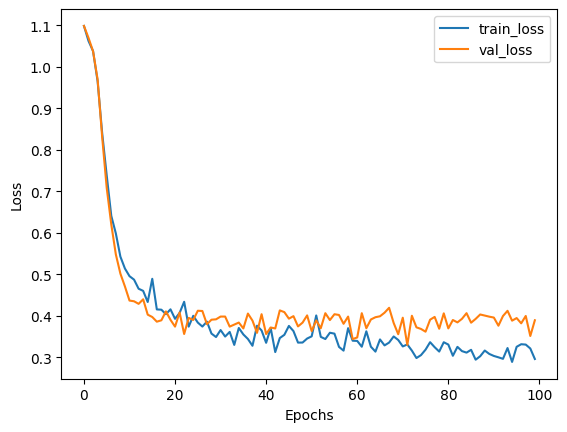

In [45]:
# plot
import matplotlib.pyplot as plt
plt.plot(train_loss[::10], label='train_loss')
plt.plot(val_loss[::10], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

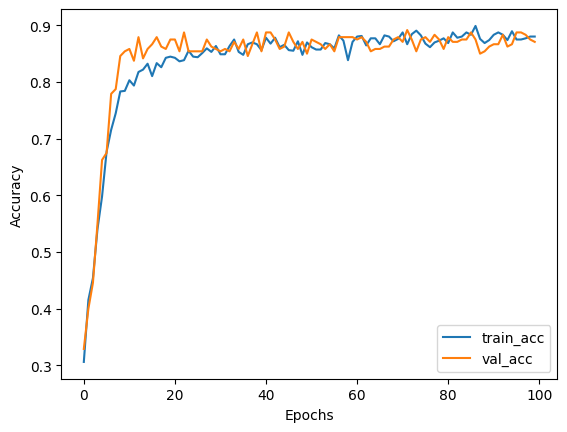

In [46]:
plt.plot(train_acc[::10], label='train_acc')
plt.plot(val_acc[::10], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc.png')
plt.show()